# Optical Flow Algorithm

The advection equation describes the movement of a particle carried by a flow
$$ \Delta I = I(t+\Delta t) - I(t) = -\Delta t(\mathbf{v}\cdot\nabla I)$$
$ \Delta I $ and $\nabla I$ are in arbitrary units (au), while we will define time to be measured in seconds (s). Given these units, we can calculate the units of $\mathbf{v}$.
$$ au = s([\mathbf{v}]\cdot au)$$

$$ \frac{au}{au} = s[\mathbf{v}]$$

$$ 1 = s[\mathbf{v}]$$
$$ \frac{1}{s} = [\mathbf{v}] $$

We find that our velocity vector $\mathbf{v}$ has units of $1/s$. When we are calculating the movement of a synthetic cell through our vector field, we need to multiply the velocity by the time step in order to calculate the change in position.

$$ \mathbf{v} = 
\begin{bmatrix}
    v_x \\
    v_y \\
\end{bmatrix}$$

$$ \mathbf{x}_n = 
\begin{bmatrix}
    x_n \\
    y_n \\
\end{bmatrix}$$

$$ \mathbf{x}_{n+1} = \mathbf{x}_n + \Delta t\times \mathbf{v}$$

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tifffile

import bebi103

import bokeh.io
notebook_url = 'localhost:8888'
bokeh.io.output_notebook()

import tqdm
import os
import sys
from imp import reload
import gbeflow

Loading BokehJS ...

# Test interpolation with multiplication by $\Delta t$

In [3]:
name = '20180110_htl_glc-CreateImageSubset-02_sc11_htl_rotate_brt'

In [4]:
df = gbeflow.tidy_vector_data(name)
tt,xx,yy,vx,vy = gbeflow.reshape_vector_data(df)

In [5]:
hst = tifffile.imread(os.path.join('../data',name+'.tif'))

## Pick start points

In [9]:
p = bebi103.viz.record_clicks(hst[0],notebook_url=notebook_url,flip=False)

In [11]:
starts = p.to_df()

## Interpolate

Identify unique values of x and y for interpolation function

In [17]:
x = np.unique(xx)
y = np.unique(yy)

Multiply `vx` and `vy` by a range of $\Delta t$ values

In [18]:
Ldt = [0.1,1,5,10,50]

In [23]:
Dtrack = {}
for dt in Ldt:
    Dtrack[dt] = []
    vxdt = vx*dt
    vydt = vy*dt
    for start in zip(starts.x,starts.y):
        Dtrack[dt].append(
            gbeflow.calc_flow_path(x,y,vxdt,vydt,start[0],start[1])
        )

100%|██████████| 165/165 [00:00<00:00, 202.44it/s]


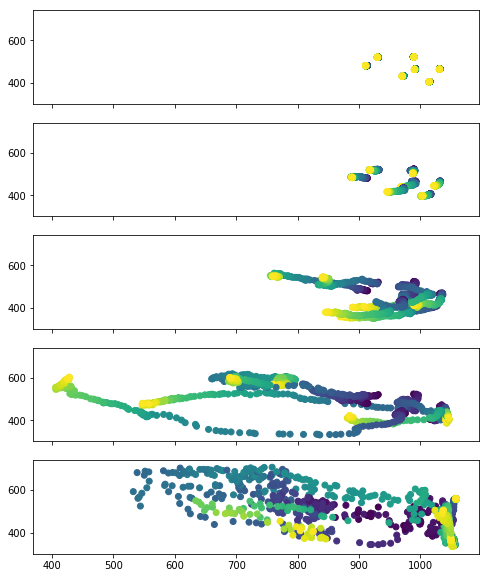

In [26]:
fig,ax = plt.subplots(len(Ldt),figsize=(8,10),sharex=True,sharey=True)
for i,dt in enumerate(Ldt):
    for track in Dtrack[dt]:
        ax[i].scatter(track[0,:],track[1,:],c=np.arange(0,166),cmap='viridis')
#         ax[i].set_aspect('equal')

When we multiply `vx` and `vy` by $\Delta t$ we see changes in the overall distance covered that correspond with the magnitude of $\Delta t$

I will add a parameter to `gbeflow.calc_flow_path` that incorporates this knowledge.

# Test new function

In [29]:
reload(gbeflow)

<module 'gbeflow' from '/Users/morganschwartz/Code/germband-extension/gbeflow/__init__.py'>

In [30]:
Dtrack2 = {}
for dt in Ldt:
    Dtrack2[dt] = []
    for start in zip(starts.x,starts.y):
        Dtrack2[dt].append(
            gbeflow.calc_flow_path(x,y,vx,vy,start[0],start[1],dt,time=False)
        )

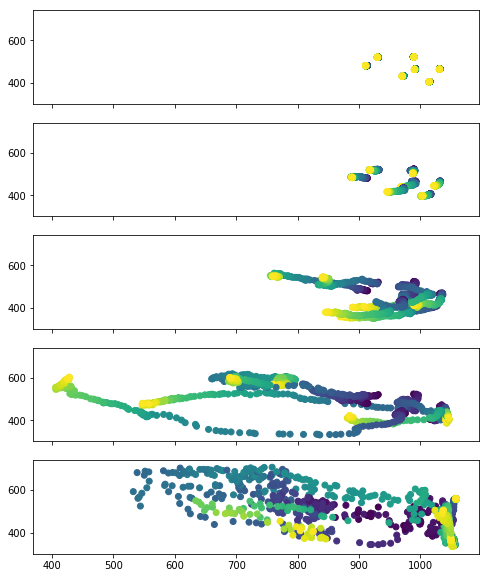

In [31]:
fig,ax = plt.subplots(len(Ldt),figsize=(8,10),sharex=True,sharey=True)
for i,dt in enumerate(Ldt):
    for track in Dtrack2[dt]:
        ax[i].scatter(track[0,:],track[1,:],c=np.arange(0,166),cmap='viridis')
#         ax[i].set_aspect('equal')